# AIChampionsHub : Python Learning Series
# COURSE : Advanced Python for Data and Analysis
# SOLUTION TO TEST
## Topics Covered So far:
- ***Module 1 : Data Manipulation in Python: ***
  -	Numpy Mastery
  -	File Handling and Manipulation – CSV, PDF, JSONs.
  -	Pandas and Dataframe
    – Data Sourcing - reading from files, databases
    - Metadata - Columns, Names, Datatypes etc.
  -	Data Analysis using Dataframe
    - Basic data statistics
    - Data quality i.e. nulls, missing values.
    - Aggregate Data Analysis using GroupBy - Summary
  - Approach
-  ***Module 2 : SQL Based Structured data management***
  -	RDBMS, SQL Basic Concepts
  - SQLLite Installation, Libraries, Sample Database
  - Connecting to a SQL database, Understanding schema and Objects
  - Basic Data Handling using SQL as main processing engine - Select, Groupby, Joins, Insert, Update etc.  
  -	Data Analysis using Dataframe with data from SQL

## In this Lesson we are going to use Visualisation Techniques to help answer business questions.
- We will use matplotlib


# Based on the concepts learned please perform answer questions using data provide
- Input file to be used : Superstore.csv
- The file contains sales data for a fictional retail company, including information on products, orders and customers.

In [ ]:
pip install matplotlib

In [21]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np

## Question 1 : Basic Analysis of Data



In [153]:
df = pd.read_csv('/content/superstore.csv')
row, col = df.shape

## Data Cleaning

In [ ]:
print("Q3 : Data Quality Analysis")
cond = df['Customer ID'].isnull()
countNoCustomerName= df[df['Customer ID'].isnull()].count()
print("\n 1C - Number of Orders with no Customer Name is : ", countNoCustomerName)

df_cleaned = df.dropna()
df_cleaned.info()
print("Number of Rows, Columns of the Cleaned Dataframe", df_cleaned.shape)

In [155]:
df = df_cleaned.copy()

In [156]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [157]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayofWeek'] = df['Order Date'].dt.dayofweek

In [ ]:
# Validate the Change in datatype
print(df.info())

# 1 - SEGMENT ANALYSIS - USING PIE CHART

In [159]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5186
Corporate,3015
Home Office,1782


<Axes: ylabel='count'>

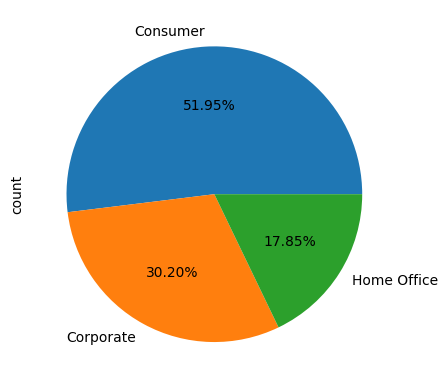

In [27]:
#create figure instance (Canvas)
fig = plt.figure()

#add the axes to the canvas
# ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) #left, bottom, width, height (range from 0 to 1)

#add the plot to the axes within the canvas
segment = df['Segment'].value_counts()
segment.plot(kind='pie', autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7a694f864b50>,
 [Text(-0.06728695710440023, 1.0979401010089898, 'Consumer'),
  Text(-0.5269592780749139, -0.965564042024539, 'Corporate'),
  Text(0.9315218652286313, -0.5850359088132727, 'Home Office')],
 [Text(-0.03670197660240013, 0.5988764187321762, '51.95%'),
  Text(-0.28743233349540753, -0.5266712956497485, '30.20%'),
  Text(0.5081028355792534, -0.31911049571633054, '17.85%')])

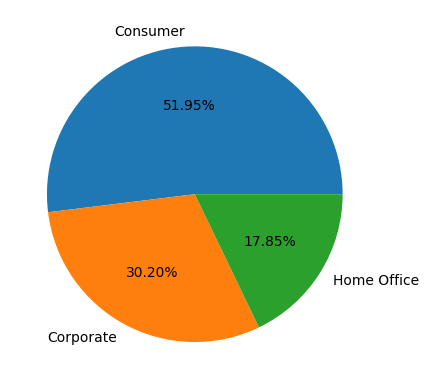

In [34]:
fig, ax = plt.subplots()
sizes = df['Segment'].value_counts()
labels = df['Segment'].unique()
ax.pie(sizes, labels=labels,autopct='%1.2f%%')

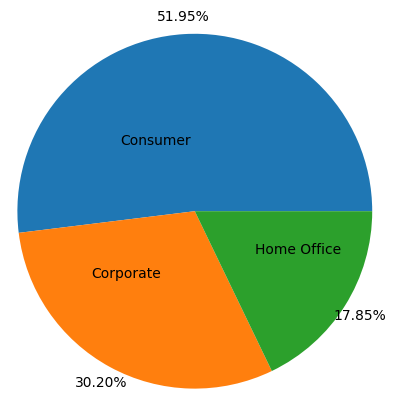

In [42]:
fig, ax = plt.subplots()
sizes = df['Segment'].value_counts()
labels = df['Segment'].unique()
ax.pie(sizes, labels=labels,autopct='%1.2f%%', pctdistance=1.1, labeldistance=.4,  radius=1.2) # Swap label and Percentages, Also control size of Pie
plt.show()

## Average Sales, Average Quantity and Average Profit

In [51]:
print("\n Q4 - What is the value of Average Sales, Average Quantity and Average Profit")
# df[["Sales", "Quantity", "Profit"]].apply([lambda x: x.mean(), lambda x: x.std()])
df[["Sales", "Quantity", "Profit"]].describe()

# Observer the Spread : min vs max, mean +/- Standard deviation


 Q4 - What is the value of Average Sales, Average Quantity and Average Profit


,Sales,Quantity,Profit
count,9983.000000,9983.000000,9983.000000
mean,229.216818,3.788741,28.463592
std,621.909610,2.223566,234.122107
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.727100
50%,54.384000,3.000000,8.643600
75%,209.905000,5.000000,29.315200
max,22638.480000,14.000000,8399.976000


# Introducing Seaborn
Seaborn is a Python package for statistical visualization built on top of Matplotlib. What makes Seaborn stand out is that it simplifies creating visualization with an excellent style. The package also works with Matplotlib, as many Seaborn APIs are tied to Matplotlib.


In [52]:
pip install seaborn

In [58]:
import seaborn as sns

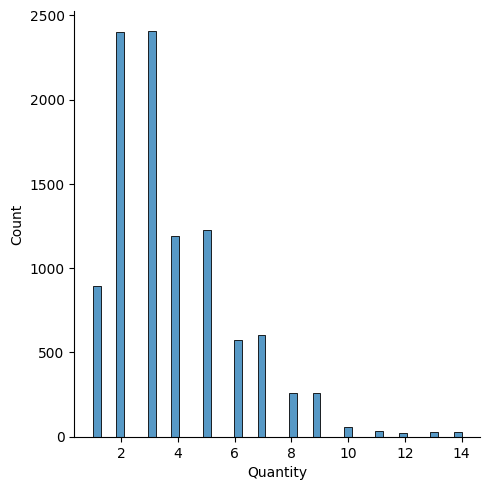

In [56]:
# Observer how Quantity is distributed
# By Default distribution plot will produce a Histogram
sns.displot(data = df, x = 'Quantity')

# What can we conclude about Quantity?

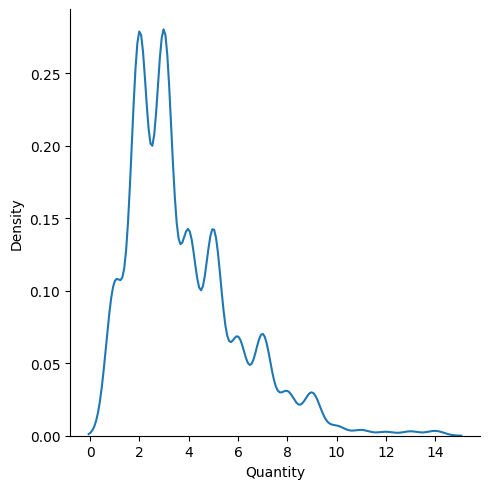

In [59]:
sns.displot(data = df, x = 'Quantity', kind = 'kde')

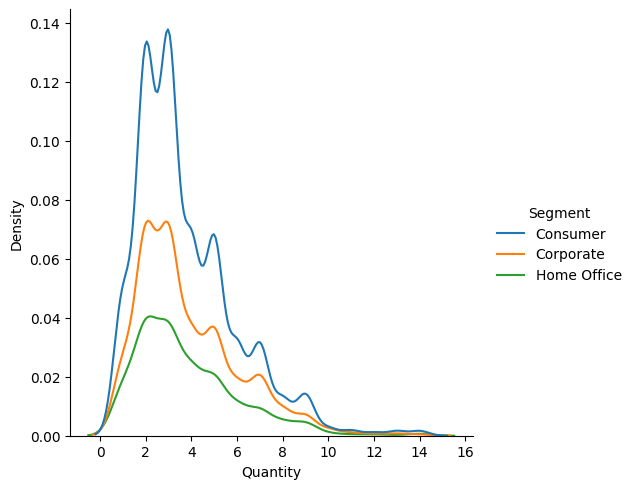

In [60]:
# The distributional plot can also be split according to the categorical values in the DataFrame using the hue parameter.
sns.displot(data = df, x = 'Quantity', kind = 'kde', hue = df['Segment'])

# Example we can look at Sales Quantity by Segment. Is the distribute for the three segements same?

# Margin or Discount Analysis

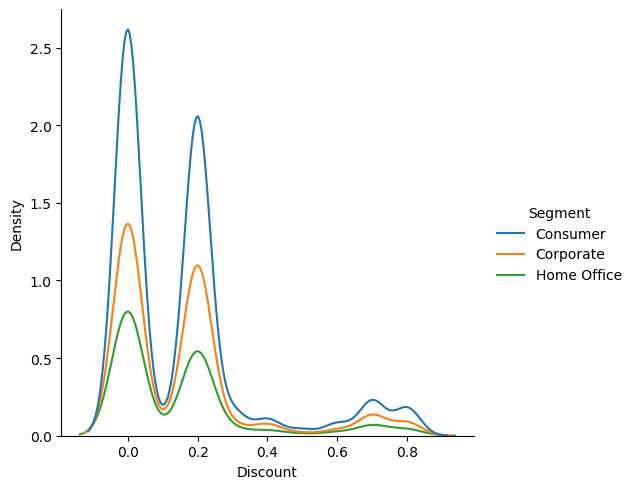

In [63]:
sns.displot(data = df, x = 'Discount', kind = 'kde', hue = df['Segment'])

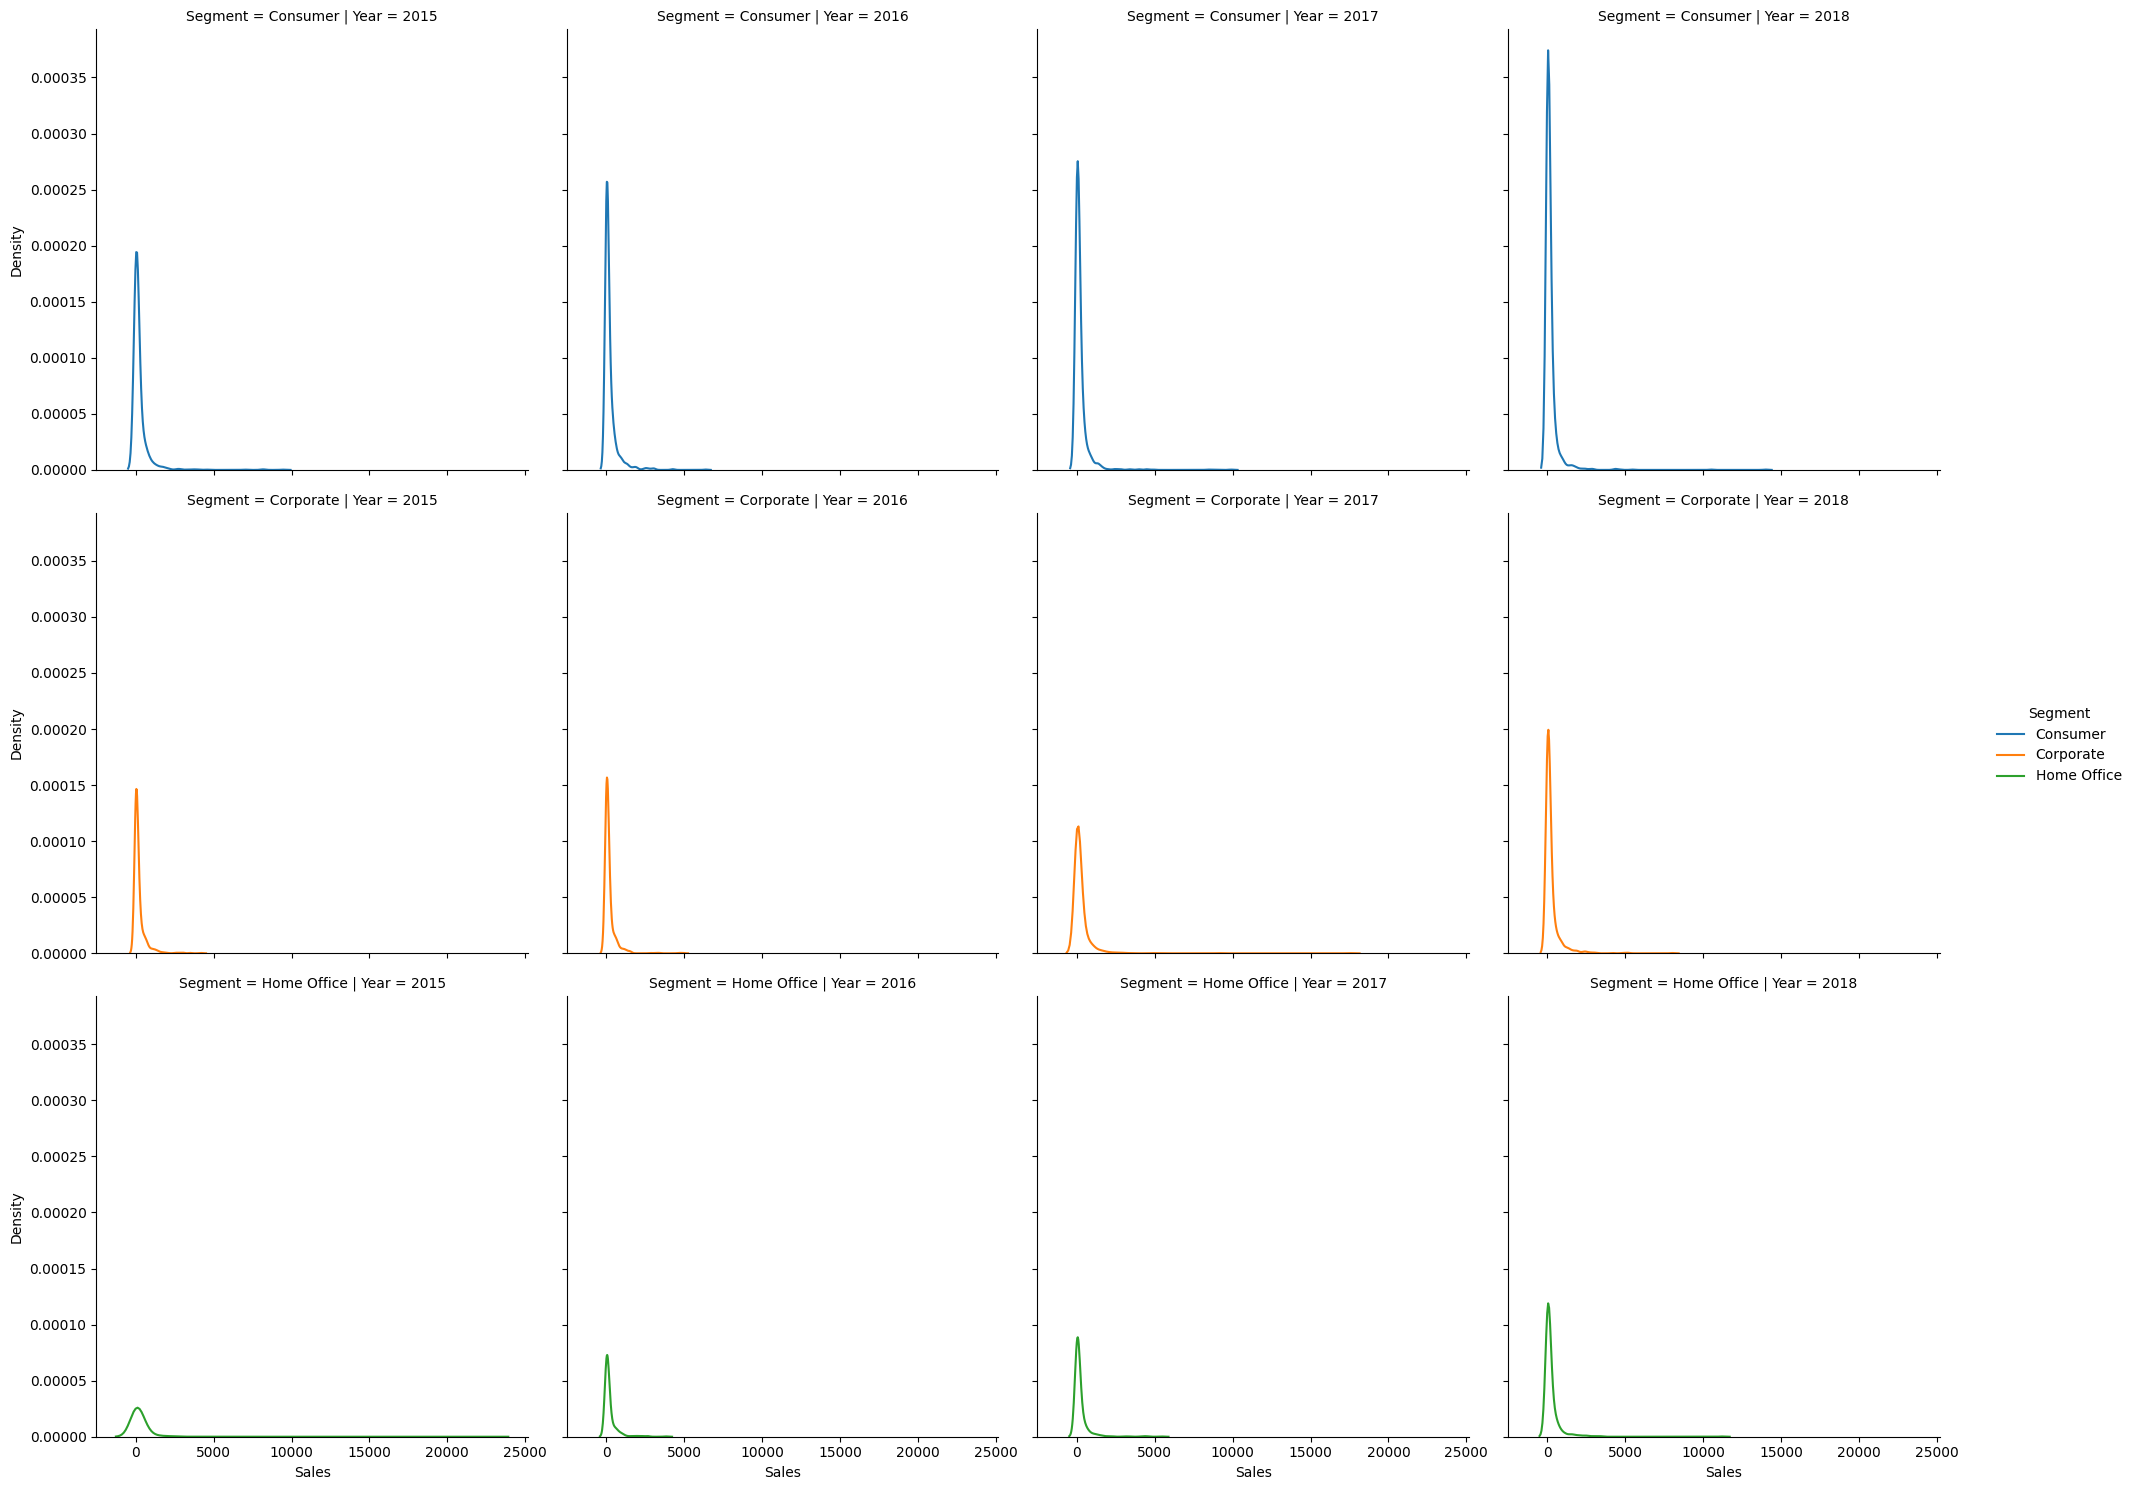

In [99]:
# Let us look at Sales across Segments - all in one plot over a period
sns.displot(data = df, x = 'Sales', kind = 'kde', hue = df['Segment'], row = 'Segment', col = 'Year')

# Margin Analysis

In [75]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Day', 'DayofWeek'],
      dtype='object')

In [73]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6020
Furniture,2119
Technology,1844


In [87]:
# sns.displot(data = df, x = 'Category', hue = 'Sub-Category')
df_sales = df.groupby('Category')[['Sales', 'Profit']].sum() # Technology seems to high value?
df_sales
# sns.displot(data = df_sales, x = 'Category')

,Sales,Profit
Category,,
Furniture,736879.6953,17259.3458
Office Supplies,716837.5220,121885.0358
Technology,834554.2730,145007.6618


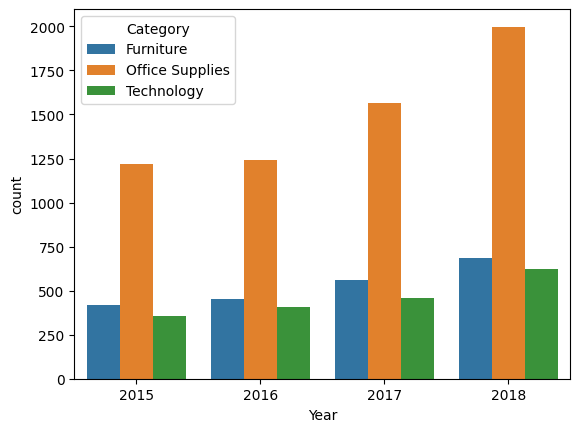

In [95]:
p = sns.countplot(data = df, x = 'Year', hue='Category')
for container in p.containers:
    ax.bar_label(container)

<Axes: xlabel='Year', ylabel='Sales'>

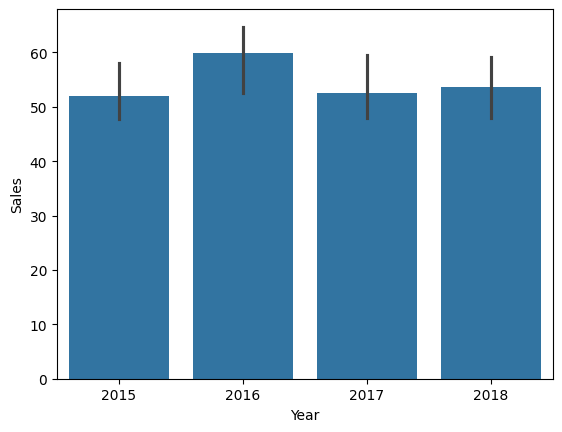

In [98]:
sns.barplot(data = df, x = 'Year', y = 'Sales', estimator = np.median)

# COUNT : From previous plots --> Sales volume is happening
# Barplot below of Sales over years shows decrease in sales.

# Look at Relationship between Sales, Profit, Discounts etc.

<Axes: xlabel='Quantity', ylabel='Sales'>

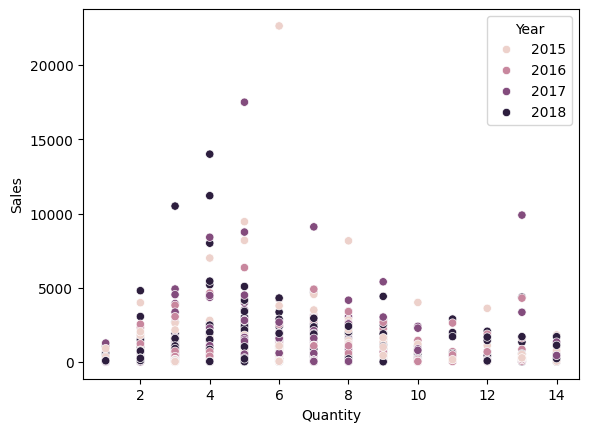

In [106]:
#sns.scatterplot(data = df, x = 'Quantity', y = 'Sales') # Basic Plot
sns.scatterplot(data = df, x = 'Quantity', y = 'Sales', hue='Year')

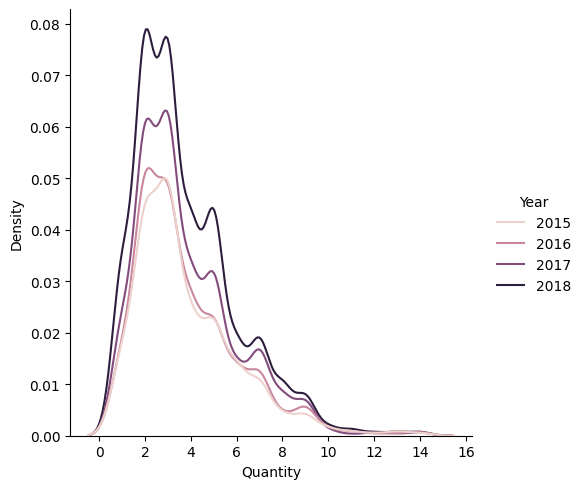

In [108]:
sns.displot(data = df, x = 'Quantity', kind = 'kde', hue = 'Year')

In [110]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Day', 'DayofWeek'],
      dtype='object')

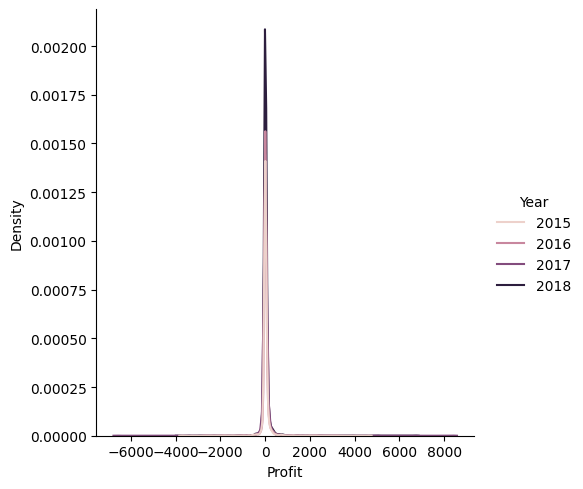

In [111]:
sns.displot(data = df, x = 'Profit', kind = 'kde', hue = 'Year') # Observe Negative Margin

In [ ]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Sales', hue='Year')

In [ ]:
sns.scatterplot(data = df, x = 'Category', y = 'Profit', hue='Year')
# sns.scatterplot(data = df, x = 'Category', y = 'Profit')

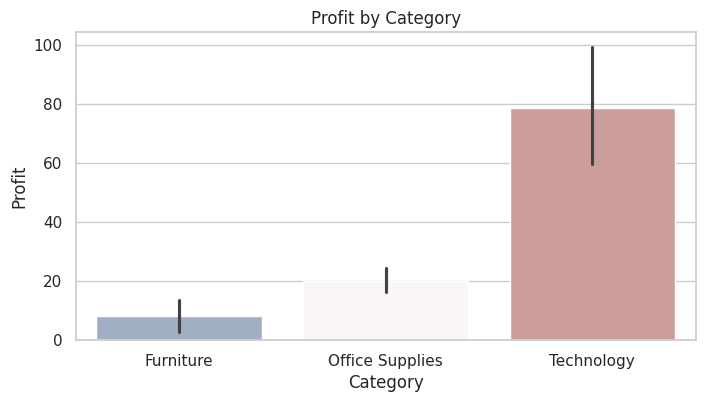

In [118]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Category', y='Profit', data=df, palette='vlag')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

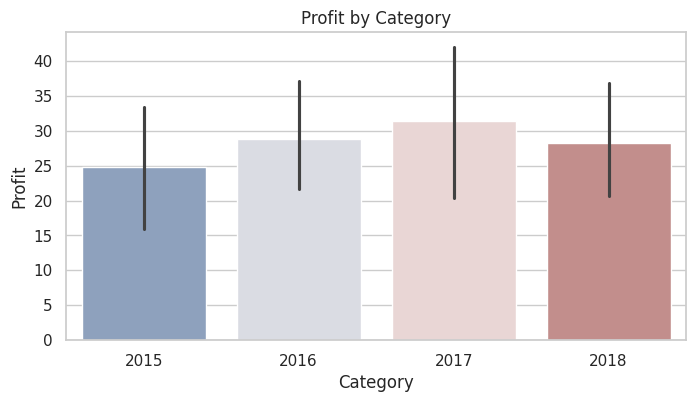

In [162]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Year', y='Profit', data=df, palette='vlag')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

In [121]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Net_Change': [150, -120, 180, -100, 200, -160]
}
df = pd.DataFrame(data)
print(df)

  Month  Net_Change
0   Jan         150
1   Feb        -120
2   Mar         180
3   Apr        -100
4   May         200
5   Jun        -160


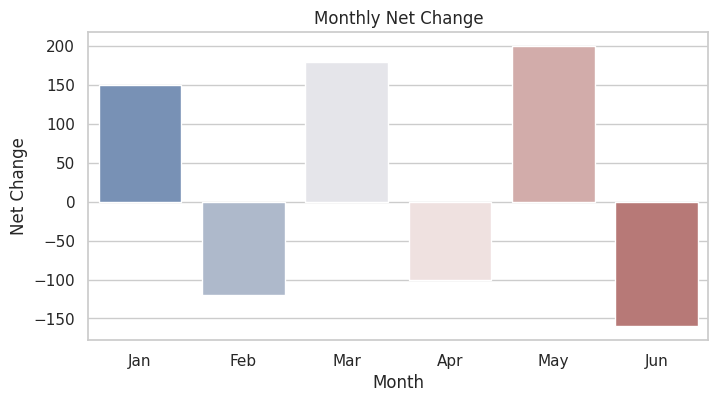

In [122]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Month', y='Net_Change', data=df, palette='vlag')
plt.title('Monthly Net Change')
plt.xlabel('Month')
plt.ylabel('Net Change')
plt.show()

In [160]:
cond1 = df['Profit'] >= 0
cond2 = df['Profit'] < 0
df.loc[cond1, 'Profit_Positive'] = df.loc[cond1, 'Profit']
df.loc[cond2, 'Profit_Negative'] = df.loc[cond2, 'Profit']

In [161]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Month,Day,DayofWeek,Profit_Positive,Profit_Negative
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2.0,0.00,41.9136,2017,11,8,2,41.9136,NaN
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3.0,0.00,219.5820,2017,11,8,2,219.5820,NaN
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2.0,0.00,6.8714,2017,6,12,0,6.8714,NaN
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5.0,0.45,-383.0310,2016,10,11,1,NaN,-383.031
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2.0,0.20,2.5164,2016,10,11,1,2.5164,NaN


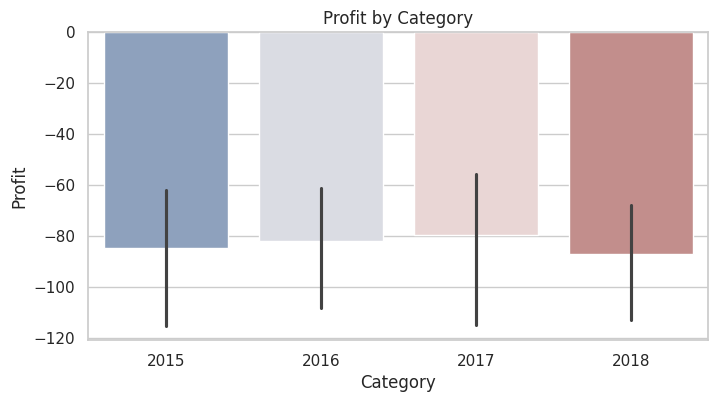

In [167]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
#bar_plot = sns.barplot(x='Year', y='Profit_Positive', data=df, palette='vlag')
bar_plot = sns.barplot(x='Year', y='Profit_Negative', data=df, palette='vlag')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

In [171]:
# df[['Sales', 'Discount', 'Profit', 'Quantity']]
cols = ['Sales', 'Quantity', 'Discount', 'Profit_Positive', 'Profit_Negative']
df_grouped_category = df.groupby(['Category','Sub-Category','Year', 'Month'])[cols].sum()

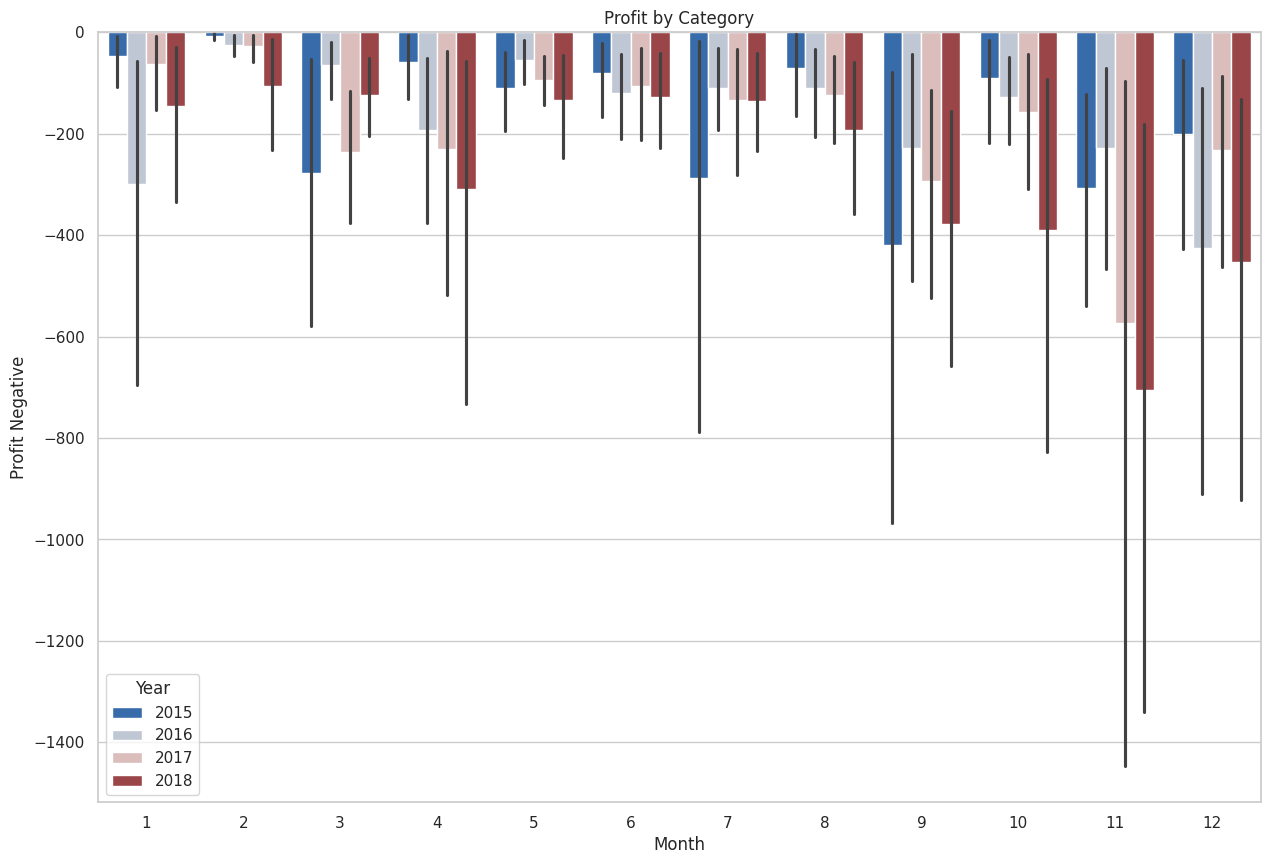

In [201]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
#bar_plot = sns.barplot(x='Year', y='Profit_Negative', data=df_grouped_category, palette='vlag')
bar_plot = sns.barplot(x='Month', y='Profit_Negative', data=df_grouped_category, palette='vlag', hue='Year')
plt.title('Profit by Category')
plt.xlabel('Month')
plt.ylabel('Profit Negative')
plt.show()

In [207]:
cond1 = df['Year'] == 2018
cond2 = df['Month'] == 11
#df_year = df[cond1]
df_nov = df[(cond1) & (cond2)]
df_nov.shape

(459, 27)

In [208]:
# df[['Sales', 'Discount', 'Profit', 'Quantity']]
df['Year'] == 2018
cols = ['Sales', 'Quantity', 'Discount', 'Profit_Positive', 'Profit_Negative']
df_grouped_month = df_nov.groupby(['Category','Sub-Category'])[cols].sum()
df_grouped_month.sort_values(by='Profit_Negative', ascending=True, inplace=True)

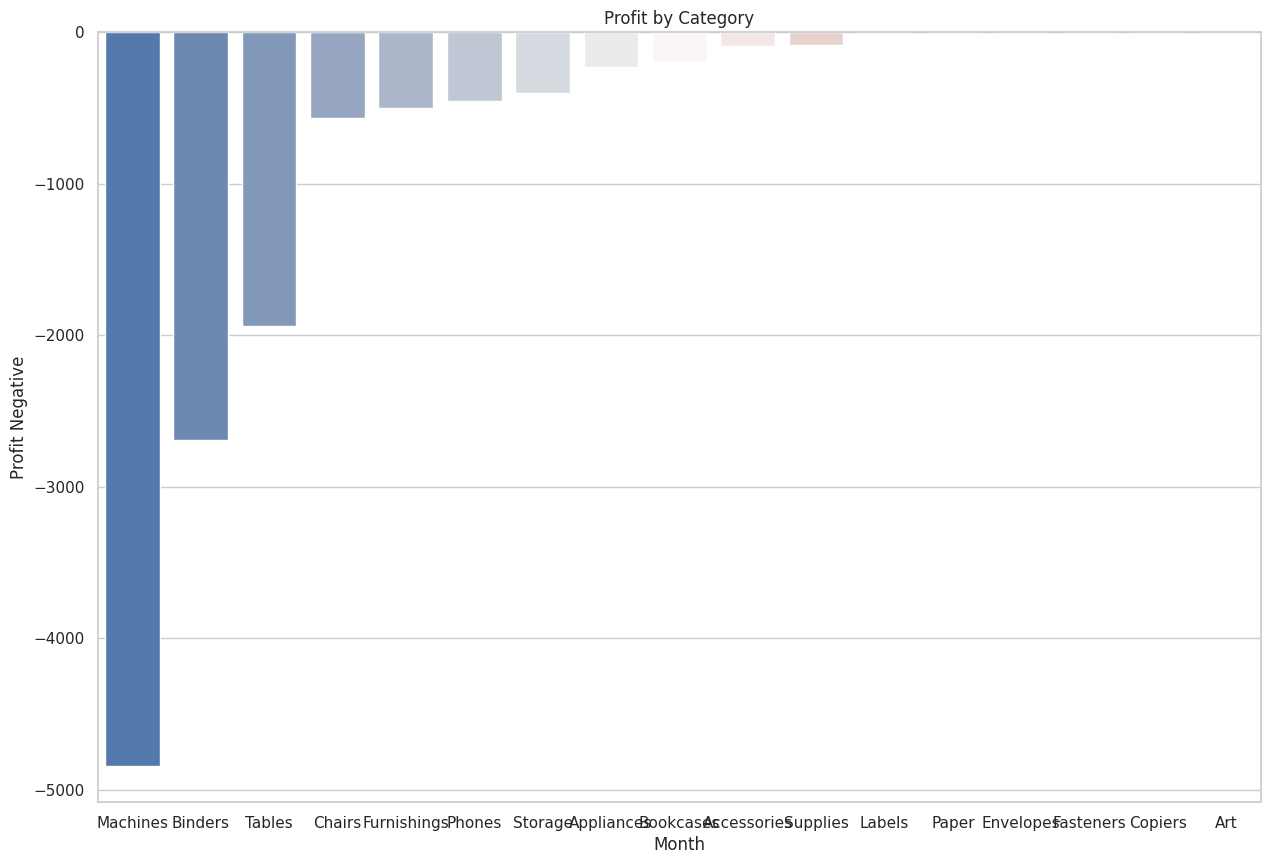

In [215]:
# Observe that we have problems with few categories like Machine, Binders, Tables. We can then deep dive further to see the discount etc.
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x='Sub-Category', y='Profit_Negative', data=df_grouped_month, palette='vlag')
plt.title('Profit by Category')
plt.xlabel('Month')
plt.ylabel('Profit Negative')
plt.show()

In [212]:
df_grouped_month

Sales  Quantity  Discount  Profit_Positive  \
Category        Sub-Category                                                   
Technology      Machines      11761.377      21.0      2.30         344.1189   
Office Supplies Binders        6490.565     288.0     26.40        1720.0437   
Furniture       Tables        13658.688      81.0      4.30         760.6836   
                Chairs        14561.218      87.0      5.10        1521.9536   
                Furnishings    6714.122     179.0      5.60        1324.1989   
Technology      Phones        17407.140     175.0      7.00        3013.7774   
Office Supplies Storage       11911.276     174.0      2.80        1783.3159   
                Appliances     6746.070      91.0      4.20        1250.1669   
Furniture       Bookcases      2122.687      17.0      1.39           0.0000   
Technology      Accessories    8390.320     179.0      3.40        2274.6161   
Office Supplies Supplies        451.998      12.0      0.60          15.4045   
                Labels          207.928      36.0      0.80          92.3469   
                Paper          3620.614     256.0      5.20        1547.2845   
                Envelopes       518.632      38.0      0.80         231.6358   
                Fasteners       138.212      29.0      0.40          60.8579   
Technology      Copiers       12359.936       8.0      0.60        5426.9789   
Office Supplies Art            1387.042     169.0      3.00         311.9724   

                              Profit_Negative  
Category        Sub-Category                   
Technology      Machines           -4839.9459  
Office Supplies Binders            -2693.2249  
Furniture       Tables             -1937.0581  
                Chairs              -567.9253  
                Furnishings         -501.6448  
Technology      Phones              -451.1171  
Office Supplies Storage             -399.0563  
                Appliances          -229.2562  
Furniture       Bookcases           -194.1442  
Technology      Accessories          -93.4912  
Office Supplies Supplies             -82.3882  
                Labels                 0.0000  
                Paper                  0.0000  
                Envelopes              0.0000  
                Fasteners              0.0000  
Technology      Copiers                0.0000  
Office Supplies Art                    0.0000

In [217]:
cond1 = df['Year'] == 2018
cond2 = df['Month'] == 11
cond3 = df['Sub-Category'] == 'Machines'
#df_year = df[cond1]
df_machines = df[(cond1) & (cond2) & (cond3)]
df_machines

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Month,Day,DayofWeek,Profit_Positive,Profit_Negative
683,684,US-2018-168116,2018-11-04,2018-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,7999.980,4.0,0.5,-3839.9904,2018,11,4,6,NaN,-3839.9904
1364,1365,US-2018-155425,2018-11-10,2018-11-11,First Class,AB-10600,Ann Blume,Corporate,United States,Tucson,...,95.994,2.0,0.7,-63.9960,2018,11,10,5,NaN,-63.9960
2628,2629,US-2018-165344,2018-11-13,2018-11-15,First Class,SB-20290,Sean Braxton,Corporate,United States,Springfield,...,652.995,7.0,0.7,-935.9595,2018,11,13,1,NaN,-935.9595
3298,3299,CA-2018-136308,2018-11-16,2018-11-16,Same Day,MW-18235,Mitch Willingham,Corporate,United States,San Francisco,...,1919.976,3.0,0.2,215.9973,2018,11,16,4,215.9973,NaN
5268,5269,US-2018-114657,2018-11-16,2018-11-21,Standard Class,MH-18115,Mick Hernandez,Home Office,United States,Yonkers,...,52.440,4.0,0.0,24.1224,2018,11,16,4,24.1224,NaN
6363,6364,CA-2018-110443,2018-11-21,2018-11-25,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Renton,...,1039.992,1.0,0.2,103.9992,2018,11,21,2,103.9992,NaN


In [ ]:
df_machines[cols]

# Here Write down your Analysis output in two or three sentences

In [ ]:
print("\n BONUS - Analyse the results and see if there is difference based on category")